<a href="https://colab.research.google.com/github/seungjoohan/image_classification/blob/main/Intel_Image_Classification_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade -q

In [ ]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
root_dir = 'gdrive/My Drive/Colab Notebooks/'
base_dir = root_dir + 'Intel/seg_data'
path = Path(base_dir)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    print(os.path.join(dirname,filename))

Streaming output truncated to the last 5000 lines.
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5279.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5239.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5167.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5090.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5316.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5182.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5095.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5304.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/510.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5321.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train/street/5097.jpg
gdrive/My Drive/Colab Notebooks/Intel/seg_data/s

In [ ]:
path = Path('gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/')
path.ls()

(#2) [Path('gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_train'),Path('gdrive/My Drive/Colab Notebooks/Intel/seg_data/seg_test/seg_test')]

In [ ]:
fields = DataBlock(blocks= (ImageBlock,CategoryBlock),
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(valid_pct=0.2,seed=42),
                   item_tfms = RandomResizedCrop(224,min_scale=0.5),
                   batch_tfms = aug_transforms()
                   )

In [ ]:
dls = fields.dataloaders(path)

In [ ]:
dls.vocab

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

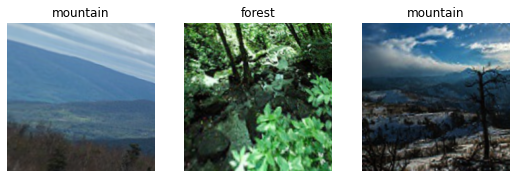

In [ ]:
dls.train.show_batch(nrows=1,ncols=3)

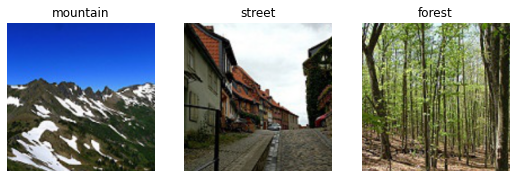

In [ ]:
dls.valid.show_batch(nrows=1,ncols=3)

In [ ]:
learn = cnn_learner(dls,resnet34,metrics=[accuracy,error_rate])
learn.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.727332,0.334694,0.890781,0.109219,35:55
1,0.391835,0.279417,0.911627,0.088373,01:19
2,0.342067,0.237990,0.921315,0.078685,01:19
3,0.270103,0.222097,0.924545,0.075455,01:19
4,0.231331,0.216446,0.925132,0.074868,01:18
5,0.232175,0.200520,0.926307,0.073693,01:17
6,0.198880,0.200341,0.930710,0.069289,01:18
7,0.179484,0.194555,0.928655,0.071345,01:19
8,0.169576,0.188205,0.932766,0.067234,01:18
9,0.178016,0.186303,0.931591,0.068409,01:18


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=9.12010818865383e-07)

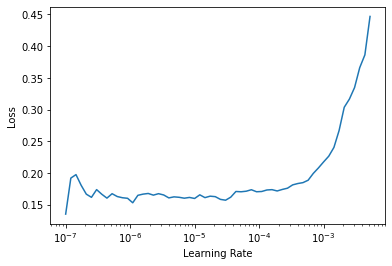

In [ ]:
learn.lr_find()

In [ ]:
learn.model_dir = '/tmp/model/'
learn.save('resnet34_version_1')

Path('/tmp/model/resnet34_version_1.pth')

In [ ]:
learn.fit_one_cycle(5,lr_max=slice(1e-07,1e-04))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.169656,0.186351,0.932178,0.067821,01:35
1,0.169112,0.186310,0.932766,0.067234,01:34
2,0.169303,0.183522,0.934527,0.065473,01:35
3,0.165042,0.188832,0.932766,0.067234,01:36
4,0.152989,0.187224,0.933940,0.066060,01:36


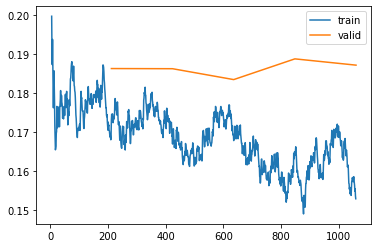

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save('resnet34_verision_1.1')

Path('/tmp/model/resnet34_verision_1.1.pth')

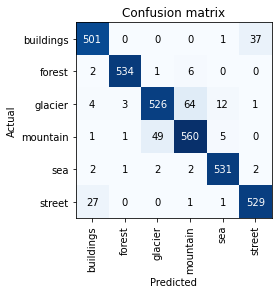

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

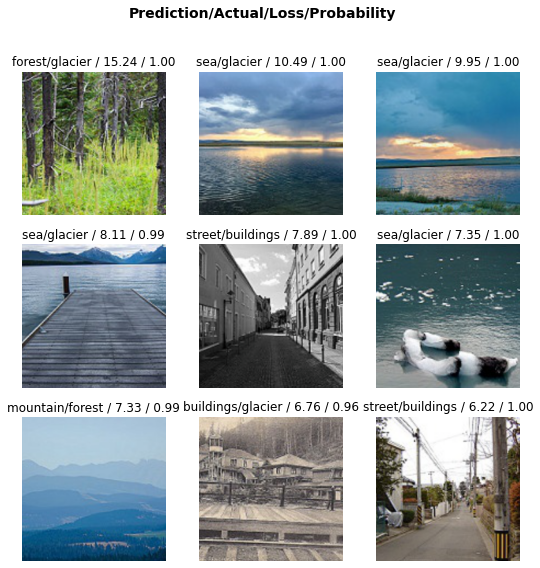

In [ ]:
interp.plot_top_losses(9)

In [ ]:
interp.most_confused(min_val=5)

[('glacier', 'mountain', 64),
 ('mountain', 'glacier', 49),
 ('buildings', 'street', 37),
 ('street', 'buildings', 27),
 ('glacier', 'sea', 12),
 ('forest', 'mountain', 6),
 ('mountain', 'sea', 5)]

In [ ]:
learn.export()

In [ ]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/My Drive/Colab Notebooks/Intel/seg_pred/seg_pred/3.jpg')

('street',
 TensorImage(5),
 TensorImage([6.0536e-04, 4.1422e-07, 4.9769e-09, 3.6587e-09, 1.5152e-08, 9.9939e-01]))

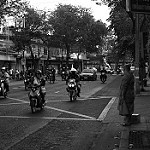

In [ ]:
from IPython.display import Image
Image('/content/gdrive/My Drive/Colab Notebooks/Intel/seg_pred/seg_pred/3.jpg')

In [ ]:
import ipywidgets as widgets
btn_upload = widgets.FileUpload()

In [ ]:
out_pl = widgets.Output()

In [ ]:
btn_run = widgets.Button(description= 'Classify')

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_index, probs = learn_inf.predict(img)
  lbl_pred.value= f'Prediction: {pred}; Probability: {probs[pred_index]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
widgets.VBox([widgets.Label('Select your Infrastructure'),
      btn_upload,btn_run,out_pl,lbl_pred])